# Creating Dataframe

In [1]:
%reset -f
import glob, os, sys, io
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import pandas as pd
import numpy as np

from wavhandler import *
from utils import *
import multiprocessing

import logging
logger = logging.getLogger()
logger.propagate = False
logger.setLevel(logging.ERROR)
np.random.seed(0)
import seaborn as sns
sns.set()

In [2]:
def process_parallel(path):
    data, _ = read_simple([path])
    fname = path.split('/')[-1][:-4]
    processed = process_signal(fname=fname, data=data)
    df = pd.DataFrame.from_dict(processed, orient='index').reset_index()
    df['names'] = path
    return df

def make_insect_df(insect_class='Culex'):

    #insect_class='Culex'
    cpus = multiprocessing.cpu_count()
    wavhdlr = WavHandler('/home/yannis/data/insects/Potamitis/Wingbeats/{}'.format(insect_class), sample_size=-1, recursive=True)
    names = wavhdlr.wav_filenames
    pool = multiprocessing.Pool(processes=cpus)
    result_list = []
    result_list.append(pool.map(process_parallel, names))
    df = pd.concat(result_list[0], axis=0, sort=False)
    df.to_csv('./data/'+insect_class+'.csv', sep=';')
    print('{} done.'.format(insect_class))

In [3]:
make_insect_df(insect_class='Culex')
make_insect_df(insect_class='Anopheles')
make_insect_df(insect_class='Aedes')

/home/yannis/.virtualenvs/wingbeat_frequencies/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 10] No child processes.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))
/home/yannis/.virtualenvs/wingbeat_frequencies/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 10] No child processes.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))
/home/yannis/.virtualenvs/wingbeat_frequencies/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 10] No child processes.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))
/home/yannis/.virtualenvs/wingbeat_frequencies/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 10] No child p

Culex done.


/home/yannis/.virtualenvs/wingbeat_frequencies/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 10] No child processes.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))
/home/yannis/.virtualenvs/wingbeat_frequencies/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 10] No child processes.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))
/home/yannis/.virtualenvs/wingbeat_frequencies/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 10] No child processes.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))
/home/yannis/.virtualenvs/wingbeat_frequencies/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 10] No child p

Anopheles done.


/home/yannis/.virtualenvs/wingbeat_frequencies/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 10] No child processes.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))
/home/yannis/.virtualenvs/wingbeat_frequencies/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 10] No child processes.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))
/home/yannis/.virtualenvs/wingbeat_frequencies/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 10] No child processes.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))
/home/yannis/.virtualenvs/wingbeat_frequencies/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 10] No child p

Aedes done.


# Reading and Exporting Dataframe

In [4]:
def read_insect_df(insect_class='Culex'):
    df = pd.read_csv('./data/'+insect_class+'.csv', delimiter=';')
    df.drop('Unnamed: 0', axis=1, inplace=True)
    df.rename(columns={'index': 'fname'}, inplace=True)
    df['pathlen'] = df.names.apply(lambda x: len(x.split('/')))
    df['fnamelen'] = df.fname.apply(lambda x: len(x.split('_')))
    df['temp'] = df.fname.apply(lambda x: x.split('_')[-3] if len(x.split('_')) > 5 else np.nan)
    df['humd'] = df.fname.apply(lambda x: x.split('_')[-1] if len(x.split('_')) > 5 else np.nan)
    df['label1'] = insect_class
    df['label2'] = df.names.apply(lambda x: x.split("/")[-3])

    return df

In [5]:
df_culex = read_insect_df(insect_class='Culex')
df_anoph = read_insect_df(insect_class='Anopheles')
df_aedes = read_insect_df(insect_class='Aedes')

df = pd.concat([df_culex, df_anoph, df_aedes], axis=0)
df.sample(5)

,fname,pow0,pow1,pow2,fr0,fr1,fr2,damping_0,damping_1,damping_2,names,pathlen,fnamelen,temp,humd,label1,label2
101434,F161220_213936_108_G_050,0.110088,0.035003,0.006067,475.585938,889.648438,1472.656250,0.082136,0.015368,0.025531,/home/yannis/data/insects/Potamitis/Wingbeats/...,11,5,NaN,NaN,Culex,C. quinquefasciatus
38551,F170209_172424_016_G_050,0.148623,0.061936,0.019566,567.382812,1128.906250,1703.125000,0.040448,0.023356,0.019495,/home/yannis/data/insects/Potamitis/Wingbeats/...,11,5,NaN,NaN,Aedes,Ae. aegypti
56083,F170121_231834_021_G_050,0.156925,0.054124,0.001123,810.546875,1624.023438,2438.476562,0.029518,0.014432,0.000400,/home/yannis/data/insects/Potamitis/Wingbeats/...,11,5,NaN,NaN,Anopheles,An. gambiae
62293,F161219_233044_134_G_050,0.154403,0.009402,NaN,925.781250,1850.585938,NaN,0.026371,0.015567,NaN,/home/yannis/data/insects/Potamitis/Wingbeats/...,11,5,NaN,NaN,Culex,C. quinquefasciatus
35574,F161219_122956_039_G_050,0.054234,0.133247,0.001401,417.968750,833.007812,1219.726562,0.058411,0.041032,0.000000,/home/yannis/data/insects/Potamitis/Wingbeats/...,11,5,NaN,NaN,Culex,C. quinquefasciatus


## Analyzing dataframe

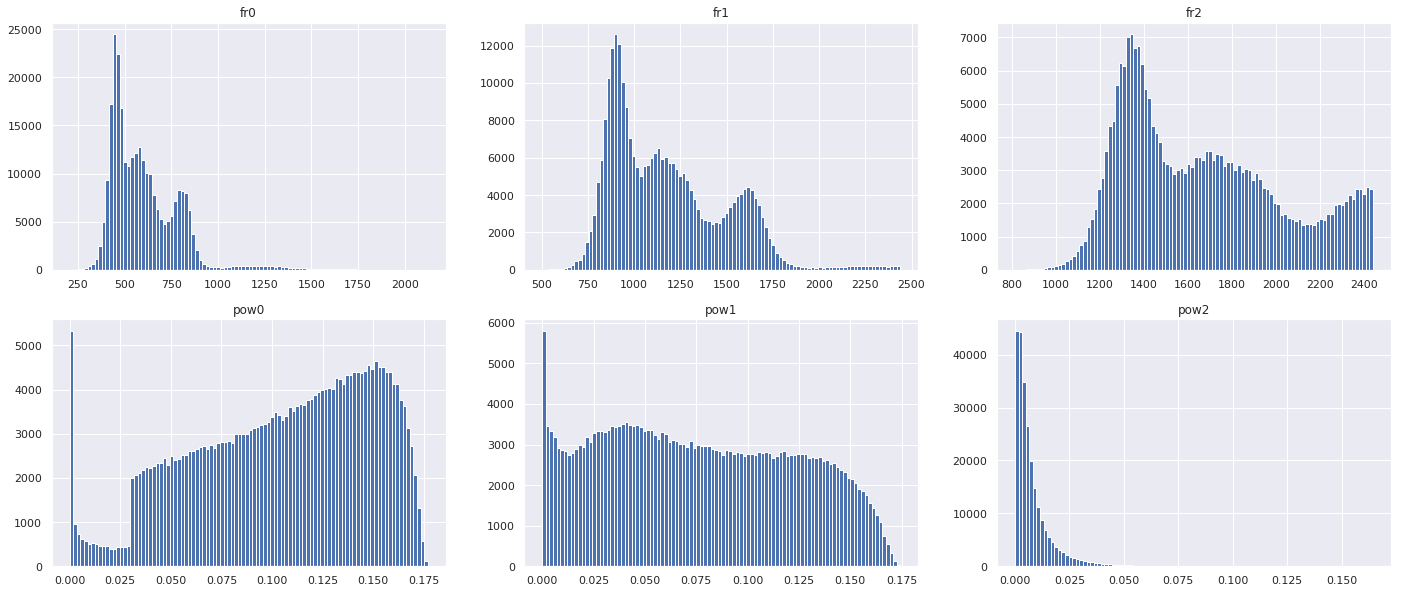

In [6]:
import matplotlib.pyplot as plt
nr_bins = 100
plt.figure(figsize=(24,10))
plt.subplot(2,3,1); plt.title('fr0'); df['fr0'].hist(bins=nr_bins)
plt.subplot(2,3,2); plt.title('fr1'); df['fr1'].hist(bins=nr_bins)
plt.subplot(2,3,3); plt.title('fr2'); df['fr2'].hist(bins=nr_bins)
plt.subplot(2,3,4); plt.title('pow0'); df['pow0'].hist(bins=nr_bins)
plt.subplot(2,3,5); plt.title('pow1'); df['pow1'].hist(bins=nr_bins)
plt.subplot(2,3,6); plt.title('pow2'); df['pow2'].hist(bins=nr_bins)
plt.show()

## After cleaning

In [7]:
df = df[(df.damping_0 > 0.005) & (df.damping_1 > 0.005) & (df.damping_2 > 0.005)]
df = df[(df.pow0 > 0.025)      & (df.pow1 > 0.005)      & (df.pow2 > 0.0005)]
df = df[(df.fr0 < 900.)        & (df.fr1 < 2000.)       & (df.fr2 < 4000.)]

df.shape

(194460, 17)

In [8]:
df.to_pickle('./data/mosquitos.pkl')

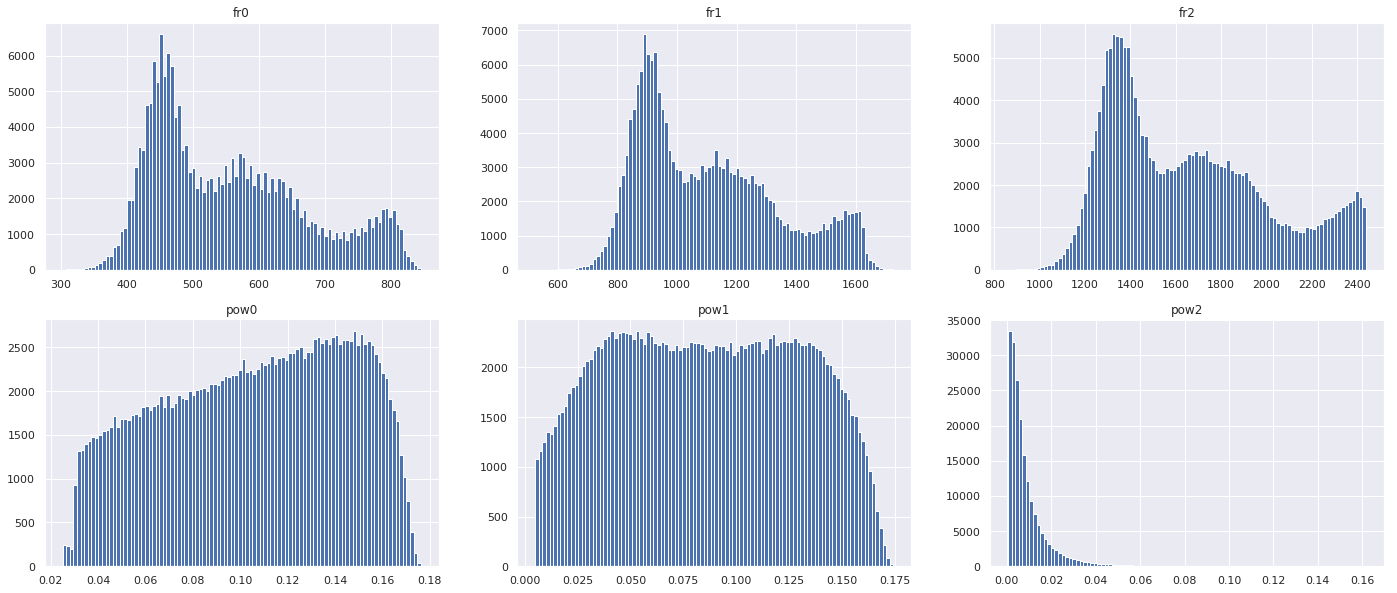

In [9]:
import matplotlib.pyplot as plt
nr_bins = 100
plt.figure(figsize=(24,10))
plt.subplot(2,3,1); plt.title('fr0'); df['fr0'].hist(bins=nr_bins)
plt.subplot(2,3,2); plt.title('fr1'); df['fr1'].hist(bins=nr_bins)
plt.subplot(2,3,3); plt.title('fr2'); df['fr2'].hist(bins=nr_bins)
plt.subplot(2,3,4); plt.title('pow0'); df['pow0'].hist(bins=nr_bins)
plt.subplot(2,3,5); plt.title('pow1'); df['pow1'].hist(bins=nr_bins)
plt.subplot(2,3,6); plt.title('pow2'); df['pow2'].hist(bins=nr_bins)
plt.show()

In [10]:
df.sample(10)

,fname,pow0,pow1,pow2,fr0,fr1,fr2,damping_0,damping_1,damping_2,names,pathlen,fnamelen,temp,humd,label1,label2
20448,F170208_123413_245_G_050,0.156749,0.024771,0.004929,659.179688,1319.335938,1963.867188,0.039259,0.018875,0.014918,/home/yannis/data/insects/Potamitis/Wingbeats/...,11,5,NaN,NaN,Aedes,Ae. aegypti
104736,F161220_234646_082_G_050,0.059118,0.098801,0.031560,460.937500,889.648438,1335.937500,0.034958,0.026894,0.018640,/home/yannis/data/insects/Potamitis/Wingbeats/...,11,5,NaN,NaN,Culex,C. quinquefasciatus
13756,F170314_131812_091_G_050_T_25.9_H_58.0,0.161804,0.042239,0.001420,505.859375,982.421875,1514.648438,0.045367,0.028827,0.011283,/home/yannis/data/insects/Potamitis/Wingbeats/...,11,9,25.9,58.0,Anopheles,An. arabiensis
15095,F170315_125201_150_G_050_T_26.6_H_78.0,0.099168,0.144819,0.002417,779.296875,1559.570312,2338.867188,0.027569,0.013776,0.009603,/home/yannis/data/insects/Potamitis/Wingbeats/...,11,9,26.6,78.0,Anopheles,An. arabiensis
98104,F161220_202139_106_G_050,0.092212,0.110517,0.005184,471.679688,954.101562,1395.507812,0.057971,0.035824,0.016095,/home/yannis/data/insects/Potamitis/Wingbeats/...,11,5,NaN,NaN,Culex,C. quinquefasciatus
63177,F170122_231902_203_G_050,0.158857,0.034812,0.001009,639.648438,1286.132812,1929.687500,0.038931,0.020121,0.017713,/home/yannis/data/insects/Potamitis/Wingbeats/...,11,5,NaN,NaN,Anopheles,An. gambiae
15237,F170315_142825_036_G_050_T_26.6_H_62.4,0.135092,0.038295,0.003574,494.140625,986.328125,1539.062500,0.065217,0.041584,0.018084,/home/yannis/data/insects/Potamitis/Wingbeats/...,11,9,26.6,62.4,Anopheles,An. arabiensis
1859,F170131_192308_067_G_050,0.124262,0.095530,0.001247,747.070312,1506.835938,2215.820312,0.033987,0.019767,0.007713,/home/yannis/data/insects/Potamitis/Wingbeats/...,11,5,NaN,NaN,Anopheles,An. arabiensis
95902,F161220_191803_208_G_050,0.056585,0.134677,0.004035,434.570312,849.609375,1269.531250,0.075281,0.035632,0.024615,/home/yannis/data/insects/Potamitis/Wingbeats/...,11,5,NaN,NaN,Culex,C. quinquefasciatus
37677,F161219_132257_094_G_050,0.114038,0.082702,0.010513,458.007812,918.945312,1378.906250,0.069296,0.037194,0.011331,/home/yannis/data/insects/Potamitis/Wingbeats/...,11,5,NaN,NaN,Culex,C. quinquefasciatus


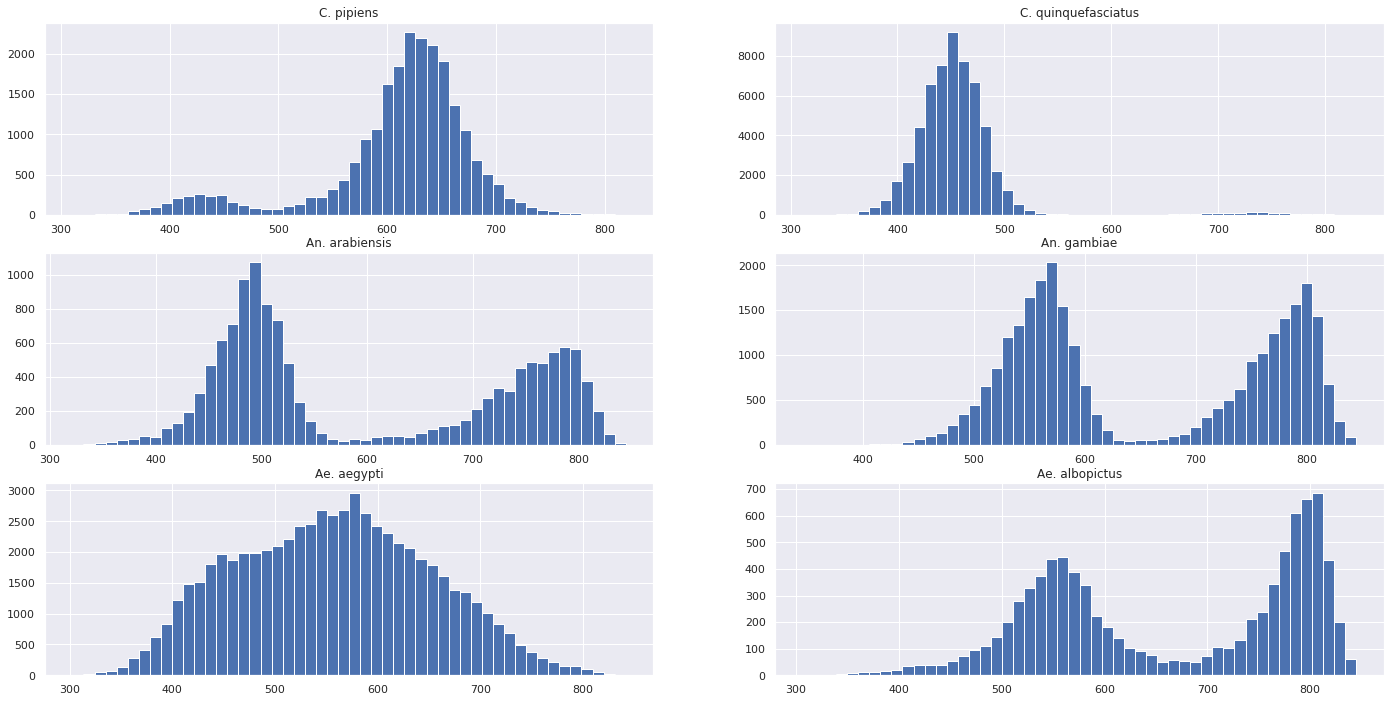

In [11]:
label = 'label2'
mosqlist = df[label].unique().tolist()
plt.figure(figsize=(24,12))
for i in range(len(mosqlist)):
    plt.subplot(3,2,i+1);
    plt.title(mosqlist[i]);
    df[df[label]==mosqlist[i]].fr0.hist(bins=50)
    #plt.ylim(0,8500)